___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val ,y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)

In [4]:
x_train.shape

(54000, 28, 28)

In [26]:
y_train.shape

(54000,)

In [27]:
y_test.shape

(10000,)

In [3]:
x_train.shape,y_train.shape

((54000, 28, 28), (54000,))

In [5]:
x_val.shape, y_val.shape

((6000, 28, 28), (6000,))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [96]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
# plt.imshow(x_train_v[6])
# plt.show()

In [10]:
classes[y_train[0]]

'Ankle boot'

(-0.5, 27.5, 27.5, -0.5)

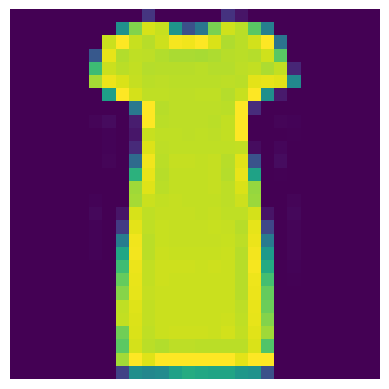

In [98]:
plt.imshow(x_train[0])
plt.axis('off')

In [ ]:
x_val.shape, y_val.shape

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
x_train_val.min()

0

In [13]:
x_train_val.max()

255

In [4]:
# x_train_val  = x_train/250.0
# x_val = x_val/250.0


x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
x_val /= 255


In [5]:
x_val.shape, y_val.shape

((6000, 28, 28), (6000,))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [6]:
import numpy as np


x_train = np.expand_dims(x_train, 3)
x_test =np.expand_dims(x_test, 3)
x_val = np.expand_dims(x_val, 3)

In [9]:
X_train.shape, X_test.shape, X_val.shape


((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [10]:
y_train.shape, y_test.shape, y_val.shape

((54000,), (10000,), (6000,))

In [11]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

In [12]:
y_train.shape, y_test.shape, y_val.shape

((54000, 10), (10000, 10), (6000, 10))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
model = Sequential([
   Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
   MaxPool2D((2,2), strides=(1,1)),
   Conv2D(64, (3,3), activation='relu'),

   # ANN
   Flatten(),
   Dense(128, activation='relu'),
   Dense(10, activation='softmax')
])


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop', 
             metrics=['accuracy'])

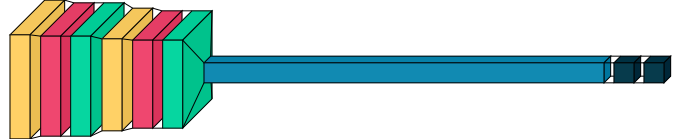

In [84]:
import visualkeras

visualkeras.layered_view(model)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4333696   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [17]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              mode='min',
                                              verbose=1,
                                              patience=20,
                                              restore_best_weights=True)


In [18]:
history = model.fit(x_train, y_train,
                     batch_size=32, 
                     validation_data = (x_val, y_val),
                     epochs=10,
                     callbacks=[early_stop],
                     shuffle =True)

Epoch 1/10
1688/1688 [==============================] - 72s 43ms/step - loss: 0.3925 - accuracy: 0.8609 - val_loss: 0.2813 - val_accuracy: 0.8997
Epoch 2/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.2436 - accuracy: 0.9115 - val_loss: 0.2369 - val_accuracy: 0.9182
Epoch 3/10
1688/1688 [==============================] - 76s 45ms/step - loss: 0.1956 - accuracy: 0.9278 - val_loss: 0.2331 - val_accuracy: 0.9185
Epoch 4/10
1688/1688 [==============================] - 80s 47ms/step - loss: 0.1617 - accuracy: 0.9423 - val_loss: 0.2838 - val_accuracy: 0.9027
Epoch 5/10
1688/1688 [==============================] - 95s 56ms/step - loss: 0.1341 - accuracy: 0.9513 - val_loss: 0.2800 - val_accuracy: 0.9120
Epoch 6/10
1688/1688 [==============================] - 84s 50ms/step - loss: 0.1097 - accuracy: 0.9604 - val_loss: 0.2717 - val_accuracy: 0.9240
Epoch 7/10
1688/1688 [==============================] - 82s 49ms/step - loss: 0.0912 - accuracy: 0.9668 - val_loss: 0.3153 -

In [ ]:
# ValueError: Data cardinality is ambiguous:
#   x sizes: 54000
#   y sizes: 6000
# Make sure all arrays contain the same number of samples.

**TASK 7: Plot values of metrics you used in your model.**

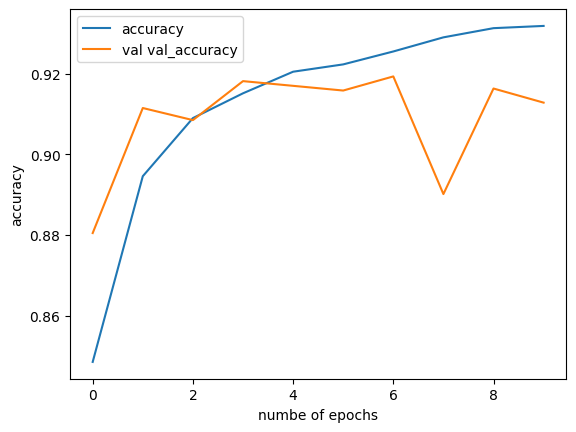

In [61]:
import pandas as pd

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('numbe of epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val val_accuracy'])

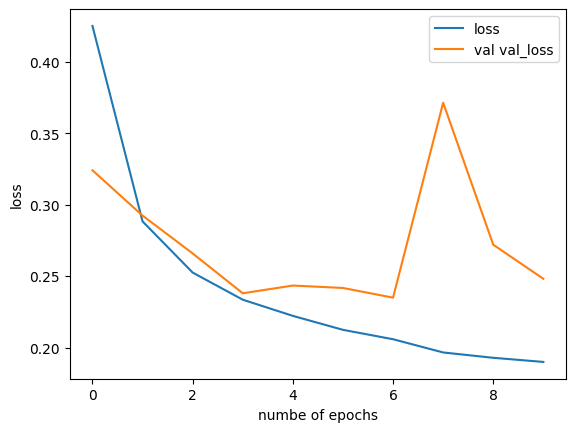

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('numbe of epochs')
plt.ylabel('loss')
plt.legend(['loss','val val_loss'])

<Axes: >

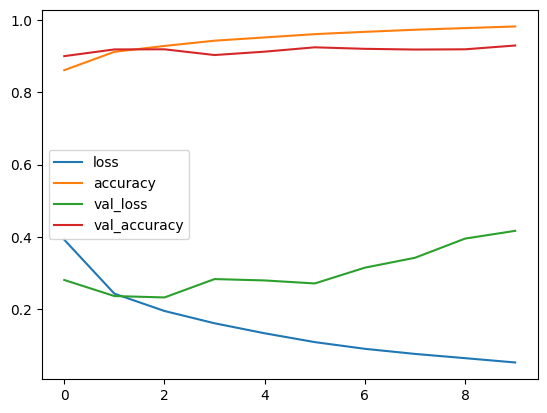

In [20]:
pd.DataFrame(history.history).plot()

In [22]:
model.metrics_names

['loss', 'accuracy']

In [21]:
summary = pd.DataFrame(history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.392493,0.860907,0.281302,0.899667
1,0.243558,0.911463,0.236896,0.918167
2,0.195637,0.927796,0.233076,0.918500
3,0.161718,0.942333,0.283816,0.902667
4,0.134078,0.951315,0.280036,0.912000


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4526731073856354
Test accuracy: 0.9165999889373779


## Prediction

In [39]:
pred_prob = model.predict(x_test)
pred_prob

  1/313 [..............................] - ETA: 9s

313/313 [==============================] - 2s 8ms/step


array([[1.1658344e-18, 1.8302680e-21, 8.4760463e-17, ..., 8.8919094e-09,
        6.6469164e-16, 1.0000000e+00],
       [2.4404062e-06, 1.8266293e-29, 9.9999762e-01, ..., 7.1819998e-23,
        3.2979364e-28, 3.7677441e-19],
       [3.8486281e-16, 1.0000000e+00, 1.3221517e-19, ..., 4.0068448e-23,
        7.9608607e-19, 6.0359350e-20],
       ...,
       [2.0666101e-31, 0.0000000e+00, 3.2877663e-30, ..., 5.8438065e-27,
        1.0000000e+00, 2.2738281e-37],
       [5.3036513e-16, 1.0000000e+00, 9.9521639e-16, ..., 4.5681930e-18,
        1.7551819e-15, 5.1792782e-13],
       [1.6980899e-11, 2.3247596e-13, 3.1216487e-09, ..., 2.5962651e-04,
        9.7028511e-08, 5.2710772e-07]], dtype=float32)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix


y_test_arg = np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)

print('Confusion Matrix')
print('classification report ')

print(classification_report(y_test_arg, Y_pred))
print(confusion_matrix(y_test_arg, Y_pred))

313/313 [==============================] - 2s 7ms/step
Confusion Matrix
classification report 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.89      0.88      1000
           3       0.92      0.91      0.92      1000
           4       0.87      0.86      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.73      0.76      1000
           7       0.97      0.97      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[890   2  13   8   1   2  77   1   6   0]
 [  3 973   3  12   4   0   2   0   3   0]
 [ 29   1 887   8  31   0  43   0   1   0]
 [ 25   1  15 912

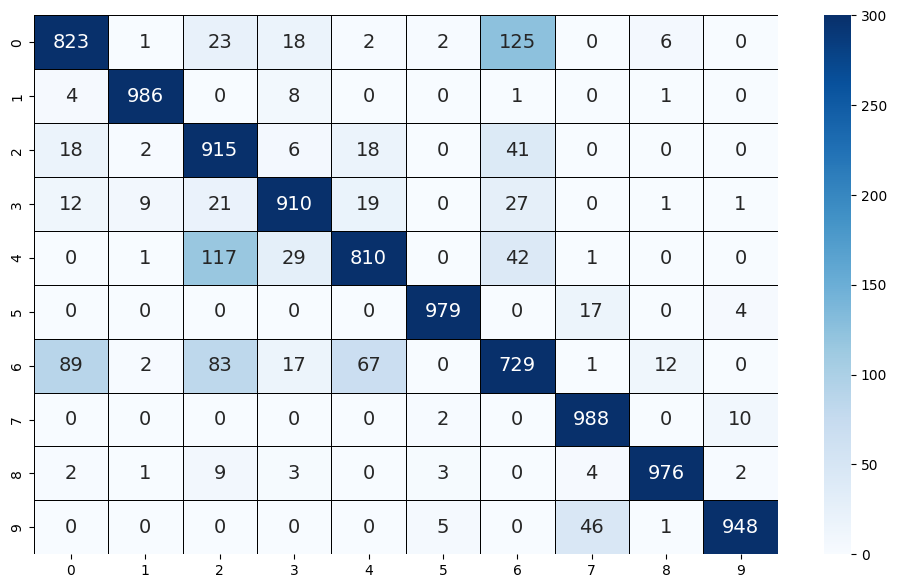

In [77]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.heatmap(
    confusion_matrix(y_test_arg, Y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

In [87]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [86]:
Y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

# Modeling 2

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


model = Sequential([
   Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
   MaxPool2D((2,2), strides=(1,1)),
   Dropout(0.4),
   Conv2D(48, (3,3), activation='relu'),
   MaxPool2D((2,2), strides=(1,1)),
   Dropout(0.4),


   # ANN
   Flatten(),
   Dense(128, activation='relu'),
   Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop', 
             metrics=['accuracy'])

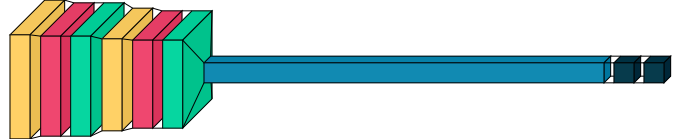

In [83]:
visualkeras.layered_view(model)


In [50]:
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              mode='min',
                                              verbose=1,
                                              patience=20,
                                              restore_best_weights=True)


In [51]:
history = model.fit(x_train, y_train,
                     batch_size=32, 
                     validation_data = (x_val, y_val),
                     epochs=10,
                     callbacks=[early_stop],
                     shuffle =True)

Epoch 1/10
1688/1688 [==============================] - 90s 53ms/step - loss: 0.4252 - accuracy: 0.8486 - val_loss: 0.3241 - val_accuracy: 0.8805
Epoch 2/10
1688/1688 [==============================] - 96s 57ms/step - loss: 0.2883 - accuracy: 0.8946 - val_loss: 0.2924 - val_accuracy: 0.9115
Epoch 3/10
1688/1688 [==============================] - 95s 56ms/step - loss: 0.2525 - accuracy: 0.9090 - val_loss: 0.2659 - val_accuracy: 0.9085
Epoch 4/10
1688/1688 [==============================] - 97s 58ms/step - loss: 0.2335 - accuracy: 0.9151 - val_loss: 0.2380 - val_accuracy: 0.9182
Epoch 5/10
1688/1688 [==============================] - 98s 58ms/step - loss: 0.2221 - accuracy: 0.9205 - val_loss: 0.2434 - val_accuracy: 0.9170
Epoch 6/10
1688/1688 [==============================] - 100s 59ms/step - loss: 0.2124 - accuracy: 0.9223 - val_loss: 0.2417 - val_accuracy: 0.9158
Epoch 7/10
1688/1688 [==============================] - 116s 69ms/step - loss: 0.2058 - accuracy: 0.9255 - val_loss: 0.2349

<Axes: >

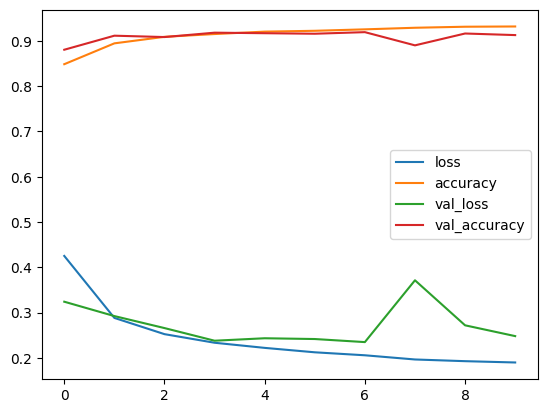

In [63]:
pd.DataFrame(history.history).plot()

In [ ]:
#we conclude here the validation acc and acc is mush close so the model quit well

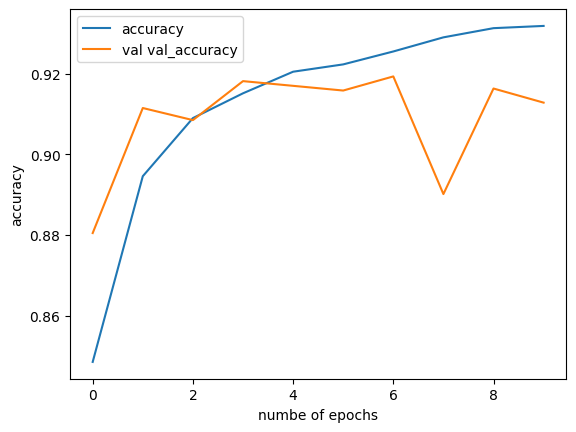

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('numbe of epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val val_accuracy'])

In [ ]:
# i cant increse n of epochs because first trying my device become over heating and stop working and time to run is 2 hours ):

Text(0, 0.5, 'loss')

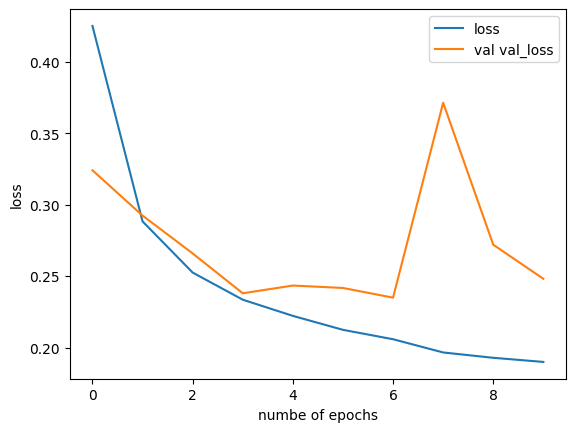

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val val_loss'])
plt.xlabel('numbe of epochs')
plt.ylabel('loss')

In [ ]:
#when we increse n of epochs the loss become decres

In [ ]:
# Evaluate the model 

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2712 - accuracy: 0.9064


[0.2712181508541107, 0.9064000248908997]

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2712181508541107
Test accuracy: 0.9064000248908997


In [73]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
y_test_arg = np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)

print('Confusion Matrix')
print('classification report ')

print(classification_report(y_test_arg, Y_pred))
print(confusion_matrix(y_test_arg, Y_pred))

313/313 [==============================] - 2s 8ms/step
Confusion Matrix
classification report 
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.98      0.99      0.99      1000
           2       0.78      0.92      0.84      1000
           3       0.92      0.91      0.91      1000
           4       0.88      0.81      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.76      0.73      0.74      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[823   1  23  18   2   2 125   0   6   0]
 [  4 986   0   8   0   0   1   0   1   0]
 [ 18   2 915   6  18   0  41   0   0   0]
 [ 12   9  21 910

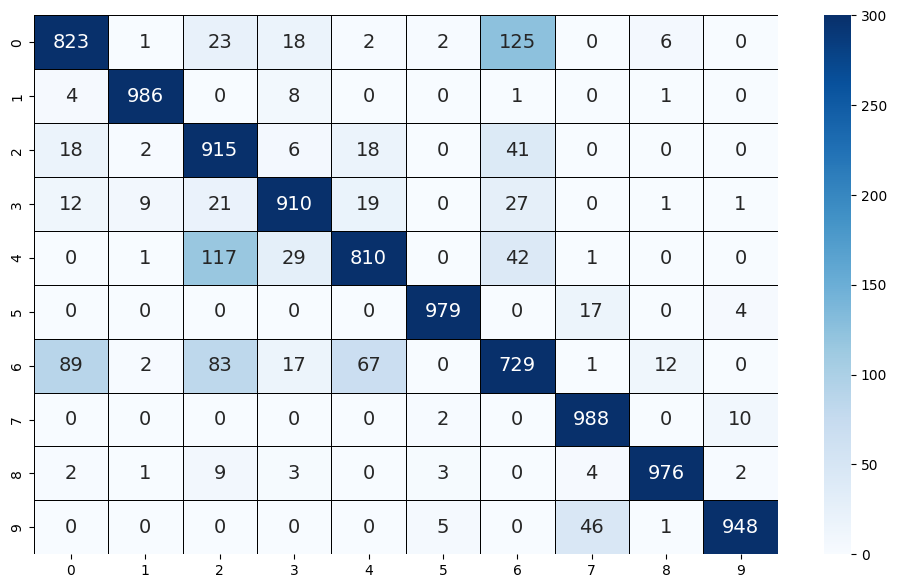

In [76]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    confusion_matrix(y_test_arg, Y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

In [ ]:
#Model 3 

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


model = Sequential([
   Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1), padding='same'),
   MaxPool2D((2,2), strides=(1,1)),
   Dropout(0.25),
   Conv2D(48, (3,3), activation='relu' , padding='same'),
   MaxPool2D((2,2), strides=(1,1)),
   Dropout(0.4),
   Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1), padding='same'),
   MaxPool2D((2,2), strides=(1,1)),
   #by default, the convolutional operation uses ‘valid‘ padding, which means that convolutions are only applied where possible.
   #This can be changed to ‘same‘ padding so that zero values are added around the input such that the output has the same size as the input.
   # ANN
   Flatten(),
   Dense(128, activation='relu'),
   Dropout(0.8),
   Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop', 
             metrics=['accuracy'])

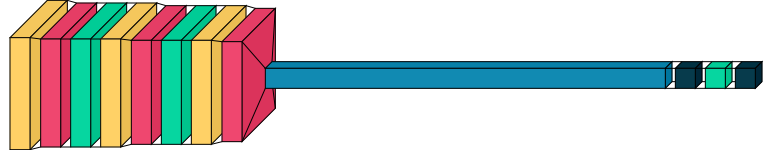

In [102]:
visualkeras.layered_view(model)


In [100]:
model.fit(x_train, y_train,
                     batch_size=32, 
                     validation_data = (x_val, y_val),
                     epochs=10,
                     callbacks=[early_stop],
                     shuffle =True)

Epoch 1/10
1688/1688 [==============================] - 314s 185ms/step - loss: 0.7718 - accuracy: 0.7299 - val_loss: 0.3784 - val_accuracy: 0.8678
Epoch 2/10
1688/1688 [==============================] - 274s 162ms/step - loss: 0.5249 - accuracy: 0.8257 - val_loss: 0.3554 - val_accuracy: 0.8778
Epoch 3/10
1688/1688 [==============================] - 278s 165ms/step - loss: 0.5030 - accuracy: 0.8370 - val_loss: 0.4785 - val_accuracy: 0.8567
Epoch 4/10
1688/1688 [==============================] - 272s 161ms/step - loss: 0.5105 - accuracy: 0.8367 - val_loss: 0.3899 - val_accuracy: 0.8737
Epoch 5/10
1688/1688 [==============================] - 270s 160ms/step - loss: 0.5349 - accuracy: 0.8289 - val_loss: 0.9950 - val_accuracy: 0.7402
Epoch 6/10
1688/1688 [==============================] - 279s 165ms/step - loss: 0.5435 - accuracy: 0.8284 - val_loss: 0.6507 - val_accuracy: 0.7757
Epoch 7/10
1688/1688 [==============================] - 270s 160ms/step - loss: 0.5626 - accuracy: 0.8229 - val_

In [105]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.543546,0.828426,0.650666,0.775667
6,0.562642,0.822852,0.791847,0.757667
7,0.570703,0.822704,0.730820,0.743167
8,0.575819,0.819185,0.465264,0.831000
9,0.586909,0.817259,0.467532,0.833333


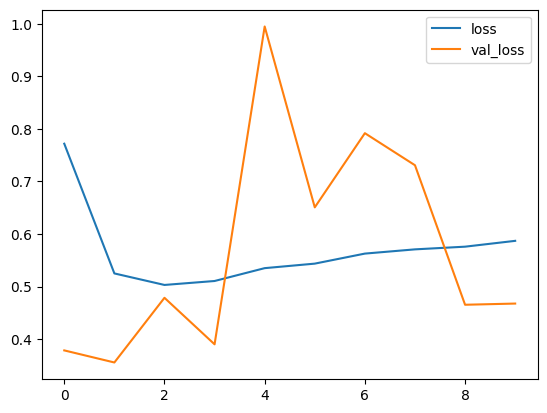

In [106]:
summary[["loss", "val_loss"]].plot()
plt.show()

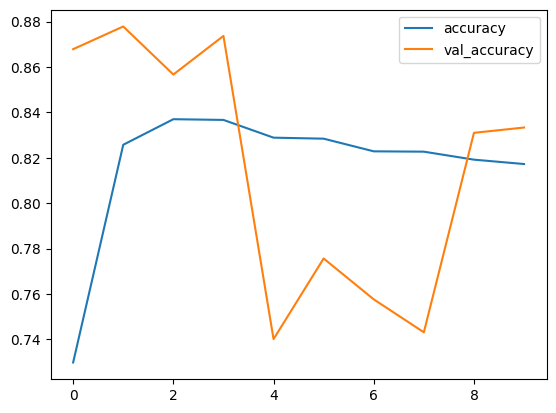

In [107]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [108]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5010387897491455
Test accuracy: 0.8256000280380249


In [110]:
pred_prob = model.predict(x_test)

313/313 [==============================] - 8s 24ms/step


In [111]:
y_test_arg = np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)

print('Confusion Matrix')
print('classification report ')

print(classification_report(y_test_arg, Y_pred))
print(confusion_matrix(y_test_arg, Y_pred))

313/313 [==============================] - 8s 26ms/step
Confusion Matrix
classification report 
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.99      0.94      0.97      1000
           2       0.79      0.64      0.70      1000
           3       0.73      0.90      0.80      1000
           4       0.57      0.93      0.71      1000
           5       0.99      0.92      0.96      1000
           6       0.76      0.40      0.52      1000
           7       0.83      1.00      0.91      1000
           8       0.99      0.92      0.95      1000
           9       0.98      0.87      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.82     10000
weighted avg       0.84      0.83      0.82     10000

[[752   0  22 120  14   1  87   2   2   0]
 [  0 940   2  51   5   0   1   0   1   0]
 [ 12   1 635  15 321   0  16   0   0   0]
 [  9   0   7 89

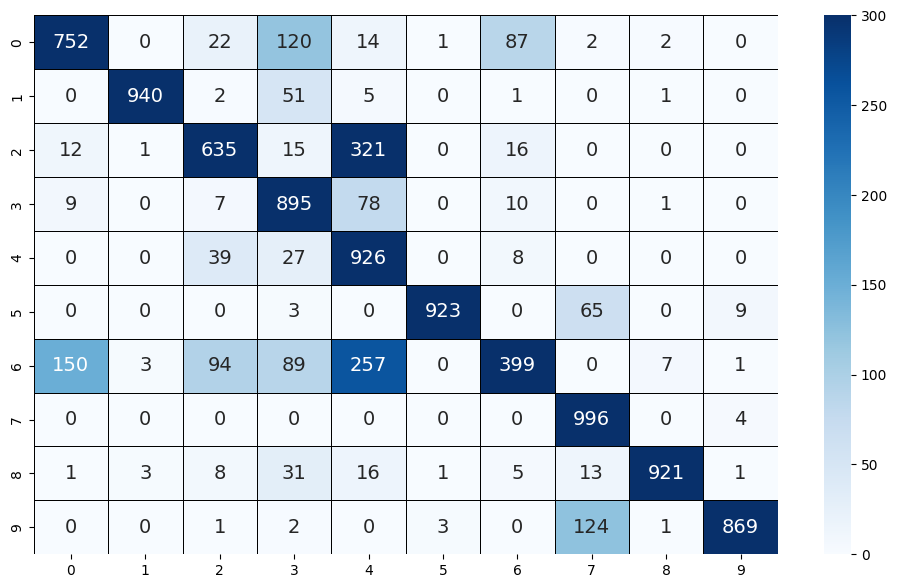

In [112]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    confusion_matrix(y_test_arg, Y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

# End of Assignment

In [129]:
my_image = x_test[20]
my_image.shape

(28, 28, 1)

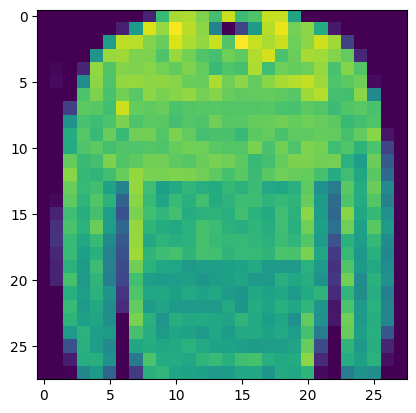

In [130]:
plt.imshow(my_image)
plt.show()

In [131]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 24ms/step


In [132]:
image_prediction

array([[2.7545886e-02, 4.0713305e-04, 7.3165202e-01, 2.4875738e-03,
        8.5145980e-02, 1.7284730e-04, 1.5124199e-01, 4.7013567e-05,
        1.0870831e-03, 2.1251399e-04]], dtype=float32)

In [133]:
np.argmax(image_prediction, axis=1)

array([2], dtype=int64)

In [134]:
result = np.argmax(image_prediction, axis=1)

In [135]:
result

array([2], dtype=int64)

In [136]:
classes[int(result)]

'Pullover'

In [137]:
model.save("cnn-1.h5")

In [138]:
model = tf.keras.models.load_model("cnn-1.h5")
#كيف يعرف ان هذا هو المودل الافضل ؟ لان كلهم نفس الاسم

In [141]:
x_test[15].shape

(28, 28, 1)

In [143]:
pred = model.predict(np.expand_dims(x_test[15], axis=0))

1/1 [==============================] - 0s 104ms/step


In [144]:
np.argmax(pred)

1

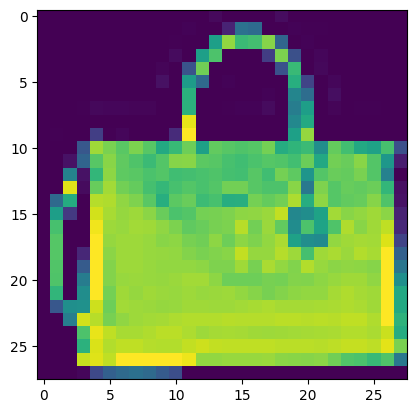

In [160]:
plt.imshow(x_test[30])
plt.show()

In [ ]:

# iwill add some modification on it , its not final 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___